# Youtube Trending Video Analysis-Stage-1 

In [1]:
#Making necessary imports 
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt

## Reading data 

In [2]:
df=pd.read_csv('../data/USvideos.csv')
#also read json 
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Replace category id with name   ---- xiuwen

In [3]:
#combine category with json file # xiuwen 
def merge_categories(csv_path: str, json_path: str, output_path: str = None) -> pd.DataFrame:


    # Read the CSV file
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} rows from {csv_path}")

    # Read the JSON file and parse the mapping from categoryId to category name
    with open(json_path, 'r', encoding='utf-8') as f:
        categories_json = json.load(f)

    mapping = {}
    for item in categories_json.get('items', []):
        cat_id = int(item.get('id', -1))
        cat_name = item.get('snippet', {}).get('title', "")
        if cat_id >= 0:
            mapping[cat_id] = cat_name

    print(f"Loaded {len(mapping)} categories from {json_path}")

    # Convert category_id to category_name
    # Note: the category_id column in the CSV may be of type int or str, so ensure consistent types
    df['category_id'] = df['category_id'].astype(int)
    df['category_name'] = df['category_id'].map(mapping).fillna('Unknown')

    print("Merged category names into DataFrame.")

    # Save to a new CSV file
    if output_path:
        df.to_csv(output_path, index=False)
        print(f"Saved merged DataFrame to {output_path}")

    return df

if __name__ == '__main__':
    # You can adjust the file paths as needed
    csv_file = '../data/USvideos.csv'
    json_file = '../data/US_category_id.json'
    output_file = '../data/USvideos_with_categories.csv'
    merged_df = merge_categories(csv_file, json_file, output_file)
    #print(merged_df.head())

Loaded 40949 rows from ../data/USvideos.csv
Loaded 32 categories from ../data/US_category_id.json
Merged category names into DataFrame.
Saved merged DataFrame to ../data/USvideos_with_categories.csv


## Loading data with category names --- xiuwen

In [4]:
df=pd.read_csv('../data/USvideos_with_categories.csv')
print(df.columns)
df.head(5)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


## Converting the date format to pandas time stamp  --- riya

In [5]:
def trending_date(s):
    yy,dd,mm= s.split('.')
    yy,dd,mm,=int(yy), int(dd), int(mm) #string to int 
    yyyy=2000+yy # pandas needs in yyyy format 
    return pd.Timestamp(year=yyyy, month=mm, day=dd)

In [6]:
df=df.copy()
df["trending_ts"] = df["trending_date"].astype(str).map(trending_date)

In [7]:
df.head(5)#added new columsn with correct format for treding date and publish time

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,trending_ts
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-14
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,2017-11-14
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-14
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2017-11-14
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017-11-14


In [8]:
#dropping the trending_date and publish_time
df=df.drop(columns=["trending_date","video_error_or_removed",
                    "ratings_disabled","comments_disabled" ,"publish_time","description","thumbnail_link", "tags","channel_title","title"])

In [9]:
df.head(5)

,video_id,category_id,views,likes,dislikes,comment_count,category_name,trending_ts
0,2kyS6SvSYSE,22,748374,57527,2966,15954,People & Blogs,2017-11-14
1,1ZAPwfrtAFY,24,2418783,97185,6146,12703,Entertainment,2017-11-14
2,5qpjK5DgCt4,23,3191434,146033,5339,8181,Comedy,2017-11-14
3,puqaWrEC7tY,24,343168,10172,666,2146,Entertainment,2017-11-14
4,d380meD0W0M,24,2095731,132235,1989,17518,Entertainment,2017-11-14


## Finding how many days the video has been trending i.e., target variable ---- riya

In [10]:
duration = (
    df.groupby("video_id")["trending_ts"]
      .nunique()
      .reset_index(name="days_trending(target)")
)
duration.head()

,video_id,days_trending(target)
0,-0CMnp02rNY,6
1,-0NYY8cqdiQ,1
2,-1Hm41N0dUs,3
3,-1yT-K3c6YI,4
4,-2RVw2_QyxQ,3


## keeping row for each video's first trending day, to predict the duration trend based on first day trending, this is specifically done to prevent leaking future information into current information, which might not provide realistic prediction --- riya

In [11]:
first_rows=(df.sort_values(['video_id','trending_ts']).drop_duplicates('video_id',keep="first")) 

In [12]:

feat = first_rows[[
    "video_id", "trending_ts", 
    "views","likes","dislikes","comment_count","category_name"
]].rename(columns={
    "trending_ts":"first_trending_ts",
    
    "views":"views_day1",
    "likes":"likes_day1",
    "dislikes":"dislikes_day1",
    "comment_count":"comments_day1"
})



In [13]:
feat.head(5)

,video_id,first_trending_ts,views_day1,likes_day1,dislikes_day1,comments_day1,category_name
39169,-0CMnp02rNY,2018-06-06,475965,6531,172,271,Entertainment
15457,-0NYY8cqdiQ,2018-02-01,563746,4429,54,94,Entertainment
31553,-1Hm41N0dUs,2018-04-29,1566807,32752,393,1490,Comedy
3019,-1yT-K3c6YI,2017-11-29,129360,5214,108,516,People & Blogs
90,-2RVw2_QyxQ,2017-11-14,67429,438,23,23,Education


## merge target variable with final columns  --- riya


In [14]:
#merge target variable with final columns
data= feat.merge(duration, on="video_id", how="left")

In [15]:
data.head(10)

,video_id,first_trending_ts,views_day1,likes_day1,dislikes_day1,comments_day1,category_name,days_trending(target)
0,-0CMnp02rNY,2018-06-06,475965,6531,172,271,Entertainment,6
1,-0NYY8cqdiQ,2018-02-01,563746,4429,54,94,Entertainment,1
2,-1Hm41N0dUs,2018-04-29,1566807,32752,393,1490,Comedy,3
3,-1yT-K3c6YI,2017-11-29,129360,5214,108,516,People & Blogs,4
4,-2RVw2_QyxQ,2017-11-14,67429,438,23,23,Education,3
5,-2aVkGcI7ZA,2018-04-27,1012527,19339,633,520,Music,4
6,-2b4qSoMnKE,2017-12-20,84744,1444,199,1610,News & Politics,2
7,-2wRFv-mScQ,2018-02-14,703371,10350,260,567,Sports,4
8,-35jibKqbEo,2018-02-15,545655,73480,727,6157,Music,8
9,-37nIo_tLnk,2017-12-26,2863,2,0,0,Sports,8


In [16]:
data.describe()

,first_trending_ts,views_day1,likes_day1,dislikes_day1,comments_day1,days_trending(target)
count,6351,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000
mean,2018-02-03 08:09:31.374586624,7.582096e+05,3.449357e+04,1427.222012,4501.707290,6.439773
min,2017-11-14 00:00:00,5.490000e+02,0.000000e+00,0.000000,0.000000,1.000000
25%,2017-12-15 00:00:00,8.351100e+04,1.908000e+03,72.000000,261.000000,3.000000
50%,2018-01-27 00:00:00,2.709020e+05,7.987000e+03,242.000000,921.000000,6.000000
75%,2018-03-15 00:00:00,7.512665e+05,2.516300e+04,763.000000,2845.000000,8.000000
max,2018-06-14 00:00:00,4.843165e+07,3.880071e+06,629120.000000,733373.000000,29.000000
std,NaN,1.928993e+06,1.162439e+05,12078.814524,21460.223331,4.628510


## Calculating the likes ratio and comments ratio which tells us the quality of engagement of the audience ---- naveena

In [17]:
data["likes_ratio"] = data["likes_day1"] / (data["likes_day1"] + data["dislikes_day1"])

In [18]:
data["comments_ratio"] = data["comments_day1"] / (data["views_day1"])

In [19]:
data.head(10)

,video_id,first_trending_ts,views_day1,likes_day1,dislikes_day1,comments_day1,category_name,days_trending(target),likes_ratio,comments_ratio
0,-0CMnp02rNY,2018-06-06,475965,6531,172,271,Entertainment,6,0.974340,0.000569
1,-0NYY8cqdiQ,2018-02-01,563746,4429,54,94,Entertainment,1,0.987954,0.000167
2,-1Hm41N0dUs,2018-04-29,1566807,32752,393,1490,Comedy,3,0.988143,0.000951
3,-1yT-K3c6YI,2017-11-29,129360,5214,108,516,People & Blogs,4,0.979707,0.003989
4,-2RVw2_QyxQ,2017-11-14,67429,438,23,23,Education,3,0.950108,0.000341
5,-2aVkGcI7ZA,2018-04-27,1012527,19339,633,520,Music,4,0.968306,0.000514
6,-2b4qSoMnKE,2017-12-20,84744,1444,199,1610,News & Politics,2,0.878880,0.018998
7,-2wRFv-mScQ,2018-02-14,703371,10350,260,567,Sports,4,0.975495,0.000806
8,-35jibKqbEo,2018-02-15,545655,73480,727,6157,Music,8,0.990203,0.011284
9,-37nIo_tLnk,2017-12-26,2863,2,0,0,Sports,8,1.000000,0.000000


### Missing value analysis for views_day1, likes_day1, dislike_day1, comments_day1----- Done by Riya

In [20]:
print (data['views_day1'].isnull().sum())

0


In [24]:
print ((data['likes_day1'] == 0).sum())

28


In [25]:
print (data['likes_day1'].isnull().sum())

0


In [22]:
print (data['dislikes_day1'].isnull().sum())

0


In [23]:
print (data['comments_day1'].isnull().sum())

0


### Missing value analysis for  likes_ratio, comments_ratio----- Done by Naveena

In [24]:
print (data['video_id'].isnull().sum())

0


In [25]:
print (data['likes_ratio'].isnull().sum())
print(data[data["likes_ratio"].isnull()])

27
         video_id first_trending_ts  views_day1  likes_day1  dislikes_day1  \
544   4HSul1NBFes        2018-02-05        3831           0              0   
710   5y-tCo_v7pk        2018-02-17      134817           0              0   
790   6oIWl1jLE20        2018-02-01      269906           0              0   
825   7Bq_H1ci9ec        2018-02-05       18336           0              0   
983   8qW6fjiMhgo        2018-01-30       23795           0              0   
1042  9TUBf6l7FBg        2018-04-14     3598220           0              0   
1152  AWgfOND2y68        2018-03-08      593426           0              0   
1264  BhIEIO0vaBE        2018-02-05    20921796           0              0   
2041  JWAvRIpuj1U        2018-01-26      110404           0              0   
2178  Kn5UgGQukYQ        2017-11-21       15058           0              0   
2234  LR2edIotyE8        2018-02-15      157494           0              0   
2616  P6Ys3PMJ3WY        2018-02-05      857336           0  

In [26]:
# number of rows before dropping the missing values
print(data.shape)

(6351, 10)


In [27]:
# few records have 0 likes,0 dislikes,hence while calculating the likes ratio,the value became NaN. We can drop these records, we cant update
# these records with mode or anythingg because it doesnt make any sense, to update the likes ratio when the number of likes itself is zero.
data = data[~data["likes_ratio"].isnull()]

In [28]:
# number of rows after dropping the missing values.
print(data.shape)

(6324, 10)


In [29]:
print (data['comments_ratio'].isnull().sum())

0


### Missing value analysis for category_name, days_trending(target), dislike_day1, first_trending_ts-----Done by Xiuwen

In [30]:
print (data['category_name'].isnull().sum())

0


In [31]:
print (data['days_trending(target)'].isnull().sum())

0


In [32]:
print (data['first_trending_ts'].isnull().sum())

0


### Outlier analysis for individual features

## Outlier Analysis done by Riya

In [33]:
# views = (data['views_day1'] - data['views_day1'].mean()) /data['views_day1'].std()
# outlier_rows = data[z_score.abs() > 3]
# print(pd.DataFrame(outlier_rows))


data['log_view_day1']=np.log1p(data['views_day1'])
data['z_view_day1'] = (data['log_view_day1'] - data['log_view_day1'].mean()) /data['log_view_day1'].std()
outliers = (data['z_view_day1'].abs() > 3).sum()

outlier_rows = data['z_view_day1'].abs() > 3
# print(pd.DataFrame(outlier_rows))
print (outliers)

# ''' 24 outliers with log scaling'''

24


In [33]:
pd.DataFrame(outlier_rows) # the rows which have outliers in views_day1

,z_view_day1
0,False
1,False
2,False
3,False
4,False
...,...
6346,False
6347,False
6348,False
6349,False


In [34]:
# # # data['z_likes'] = (data['likes_day1'] - data['likes_day1'].mean()) /data['likes_day1'].std()

data['log_likes_day1']=np.log1p(data['likes_day1'])

data['z_likes_day1'] = (data['log_likes_day1'] - data['log_likes_day1'].mean()) /data['log_likes_day1'].std()

outliers = (data['z_likes_day1'].abs() > 3).sum()
print(outliers)
# # #outlier without log were 77, now 47
# # #apply min max--77

# ''' 47 outliers with log scaling '''

47


In [35]:
# # data['z_dislikes'] = (data['dislikes_day1'] - data['dislikes_day1'].mean()) /data['dislikes_day1'].std()


data['log_dislikes_day1']=np.log1p(data['dislikes_day1'])
data['z_dislikes_day1'] = (data['log_dislikes_day1']- data['log_dislikes_day1'].mean()) /data['log_dislikes_day1'].std()
# Identify outliers
outliers = (data['z_dislikes_day1'].abs() > 3).sum()

#outliers = (z_score.abs() > 3).sum()
print(outliers)
# ''' 13 outliers with log scaling '''

13


In [36]:
# # data['log_comments_day1']=np.log1p(data['comments_day1'])
# # z_score = (data['log_comments_day1']- data['log_comments_day1'].mean()) /data['log_comments_day1'].std()

# # Identify outliers
# # x_scaled = (data['comments_day1'] - min(data['comments_day1'])) / (max(data['comments_day1']) - min(data['comments_day1']))
# # z_score = (x_scaled - np.mean(x_scaled)) / np.std(x_scaled)

data['z_comments_day1'] = (data['comments_day1'] - data['comments_day1'].mean()) /data['comments_day1'].std()
outliers = (data['z_comments_day1'].abs() > 3).sum()

#outliers = (z_score.abs()>3).sum()
print(outliers)
# '''more outliers with log scaling will go ahead with z score alone... zscore gives 52'''


52


In [37]:
''' Take away for outlier analysis on views_day1, comments_day1, dislikes_day1 and likes_day1,
the percent of outliers are quite small and can be removed.'''

' Take away for outlier analysis on views_day1, comments_day1, dislikes_day1 and likes_day1,\nthe percent of outliers are quite small and can be removed.'

## Outlier Analysis Done by Naveena

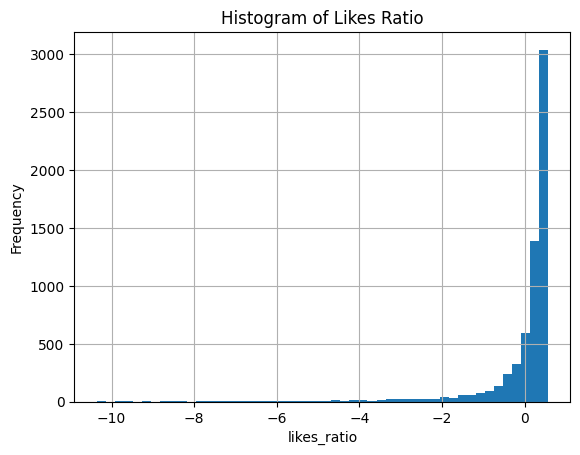

160


In [38]:
import matplotlib.pyplot as plt
data['log_likes_ratio'] = np.log1p(data['likes_ratio'])
data['z_likes_ratio'] = (data['log_likes_ratio'] - data['log_likes_ratio'].mean()) /data['log_likes_ratio'].std()
outliers = (data['z_likes_ratio'].abs() > 3).sum()

data["z_likes_ratio"].hist(bins=50)
plt.xlabel("likes_ratio")
plt.ylabel("Frequency")
plt.title("Histogram of Likes Ratio")
plt.show()
print(outliers)

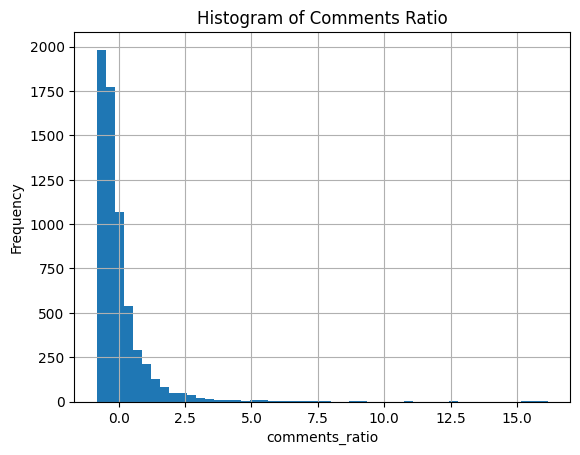

111


In [39]:
data['z_comments_ratio'] = (data['comments_ratio'] - data['comments_ratio'].mean()) /data['comments_ratio'].std()
outliers = (data['z_comments_ratio'].abs() > 3).sum()
data["z_comments_ratio"].hist(bins=50)
plt.xlabel("comments_ratio")
plt.ylabel("Frequency")
plt.title("Histogram of Comments Ratio")
plt.show()
print(outliers)

## there 111 outliers using z scores. log has 115 outliers and minmax scaler has 111 outliers , so just retained the z-scores

## Outlier Analysis by Xiuwen

In [40]:
# data['z_category_id'] = (data['category_id'] - data['category_id'].mean()) /data['category_id'].std()
# # Identify outliers
# outliers = (data['z_category_name'].abs() > 3).sum()
# print(outliers) ##"to remove these after stage 1"

In [41]:
data['z_days_trending(target)'] = (data['days_trending(target)'] - data['days_trending(target)'].mean()) /data['days_trending(target)'].std()
# Identify outliers
outliers = (data['z_days_trending(target)'].abs() > 3).sum()
print(outliers) # " not to remove these"

107


In [42]:
data['z_first_trending_ts'] = (data['first_trending_ts'] - data['first_trending_ts'].mean()) /data['first_trending_ts'].std()
# Identify outliers
outliers = (data['z_first_trending_ts'].abs() > 3).sum()
print(outliers)

0


In [43]:
print(data.columns)

Index(['video_id', 'first_trending_ts', 'views_day1', 'likes_day1',
       'dislikes_day1', 'comments_day1', 'category_name',
       'days_trending(target)', 'likes_ratio', 'comments_ratio',
       'log_view_day1', 'z_view_day1', 'log_likes_day1', 'z_likes_day1',
       'log_dislikes_day1', 'z_dislikes_day1', 'z_comments_day1',
       'log_likes_ratio', 'z_likes_ratio', 'z_comments_ratio',
       'z_days_trending(target)', 'z_first_trending_ts'],
      dtype='object')


## Dropping all the outliers.

In [44]:
outlier_rows = ((data['z_view_day1'].abs() > 3) | (data['z_likes_day1'].abs() > 3) | (data['z_dislikes_day1'].abs() > 3) | \
                (data['z_comments_day1'].abs() > 3) | (data['z_likes_ratio'].abs() > 3) | (data['z_comments_ratio'].abs() > 3) \
                | (data['z_days_trending(target)'].abs() > 3) | (data['z_first_trending_ts'].abs() > 3))
print(outlier_rows.sum())

439


## Clean and Final data without outliers

In [45]:
data_clean = data[~outlier_rows]

In [46]:
print(data.shape)

(6324, 22)


In [47]:
print(data_clean.shape)

(5885, 22)


In [48]:
data_clean.head()

,video_id,first_trending_ts,views_day1,likes_day1,dislikes_day1,comments_day1,category_name,days_trending(target),likes_ratio,comments_ratio,...,log_likes_day1,z_likes_day1,log_dislikes_day1,z_dislikes_day1,z_comments_day1,log_likes_ratio,z_likes_ratio,z_comments_ratio,z_days_trending(target),z_first_trending_ts
0,-0CMnp02rNY,2018-06-06,475965,6531,172,271,Entertainment,6,0.974340,0.000569,...,8.784468,0.032328,5.153292,-0.138103,-0.197604,0.680234,0.357650,-0.734783,-0.096039,2.125057
1,-0NYY8cqdiQ,2018-02-01,563746,4429,54,94,Entertainment,1,0.987954,0.000167,...,8.396155,-0.146111,4.007333,-0.742107,-0.205835,0.687106,0.465848,-0.792902,-1.175204,-0.041461
2,-1Hm41N0dUs,2018-04-29,1566807,32752,393,1490,Comedy,3,0.988143,0.000951,...,10.396750,0.773209,5.976351,0.295710,-0.140917,0.687201,0.467341,-0.679697,-0.743538,1.466435
3,-1yT-K3c6YI,2017-11-29,129360,5214,108,516,People & Blogs,4,0.979707,0.003989,...,8.559294,-0.071145,4.691348,-0.381581,-0.186210,0.682949,0.400392,-0.241174,-0.527705,-1.150718
4,-2RVw2_QyxQ,2017-11-14,67429,438,23,23,Education,3,0.950108,0.000341,...,6.084499,-1.208371,3.178054,-1.179198,-0.209136,0.667885,0.163222,-0.767734,-0.743538,-1.410700


In [49]:
data_clean[['video_id','first_trending_ts','views_day1','likes_day1','dislikes_day1','comments_day1','likes_ratio','comments_ratio',\
            'category_name','days_trending(target)']].to_csv('../data/newdata.csv', index=False)